# EV Charging Analysis
# 3.0 Stream 3 - Availability
Includes loading data, exploration, Availability visuals, Availability prediction, and summary.

#### 3.1  Loading Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load clean_ev_data
df = pd.read_csv('clean_ev_data.csv')
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Session Duration (hours),Price per kWh,Efficiency (km per kWh)
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000,0.215569,4.835954
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667,1.712292,9.085850
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2.800000,1.864577,3.753449
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3.700000,0.164065,2.511745
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,1.766667,0.517674,10.375504


#### A copy is made for purposes of EV charging availability Analysis

In [12]:
df_avl =df.copy()
df_avl.head(2)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Session Duration (hours),Price per kWh,Efficiency (km per kWh)
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000,0.215569,4.835954
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667,1.712292,9.085850


## 3.2 Stream 3 - Availability Analysis
**Description**  
This section reloads the cleaned data and 

**Explanation**  
These fe

### 3.2.1 Average Session duration by City
**Description**  
This bar chart shows the average session duration per hour across all cities in the dataset.

**Explanation**  
Comparing average charging durations by city reveals locations' charge type optimisation and mix. It also helps predict Urban density and driving patterns, thereby predicting demand peaks. 

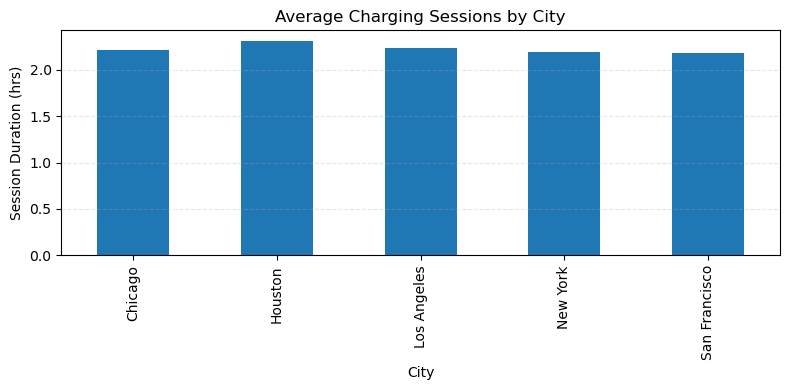

In [21]:
df.groupby('Charging Station Location')['Session Duration (hours)'].mean().plot(kind='bar', figsize=(8,4))
plt.title('Average Charging Sessions by City')
plt.xlabel('City')
plt.ylabel('Session Duration (hrs)')
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### 3.2.2 Charger Type Distribution by City
**Description**  
This graph shows the charger type distribution across all cities in the dataset.

**Explanation**  
Comparing charger type distribution 

<Figure size 1400x800 with 0 Axes>

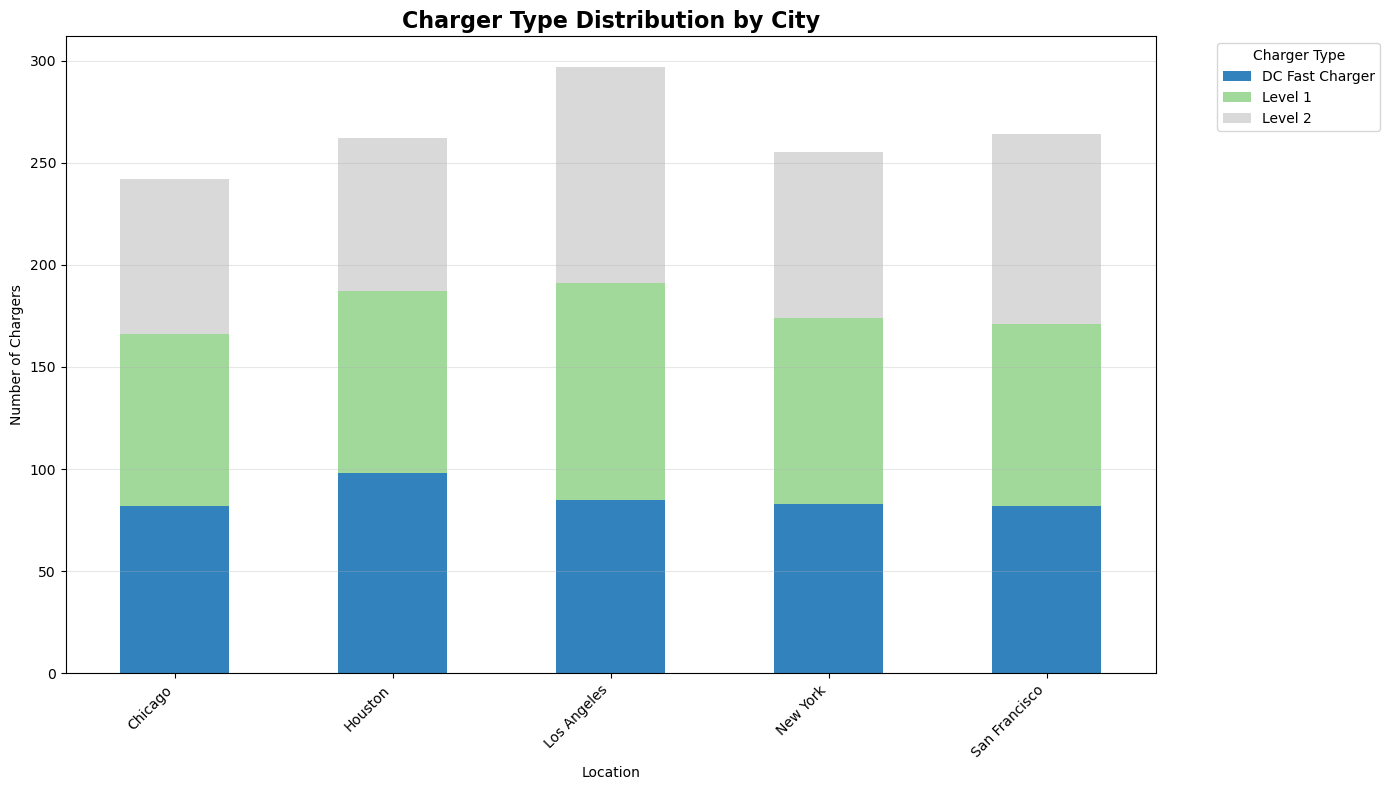

In [59]:
charger_distribution = df.groupby(['Charging Station Location', 'Charger Type']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 8))
charger_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Charger Type Distribution by City', fontsize=16, fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Number of Chargers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Charger Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 3.2.3 Average Daily Sessions per Charger Type
**Description**  
This grouped bar chart shows the daily average sessions per charger type across all cities in the dataset.

**Explanation**  
Comparing average charging sessions by charger types reveals the demand patterns.


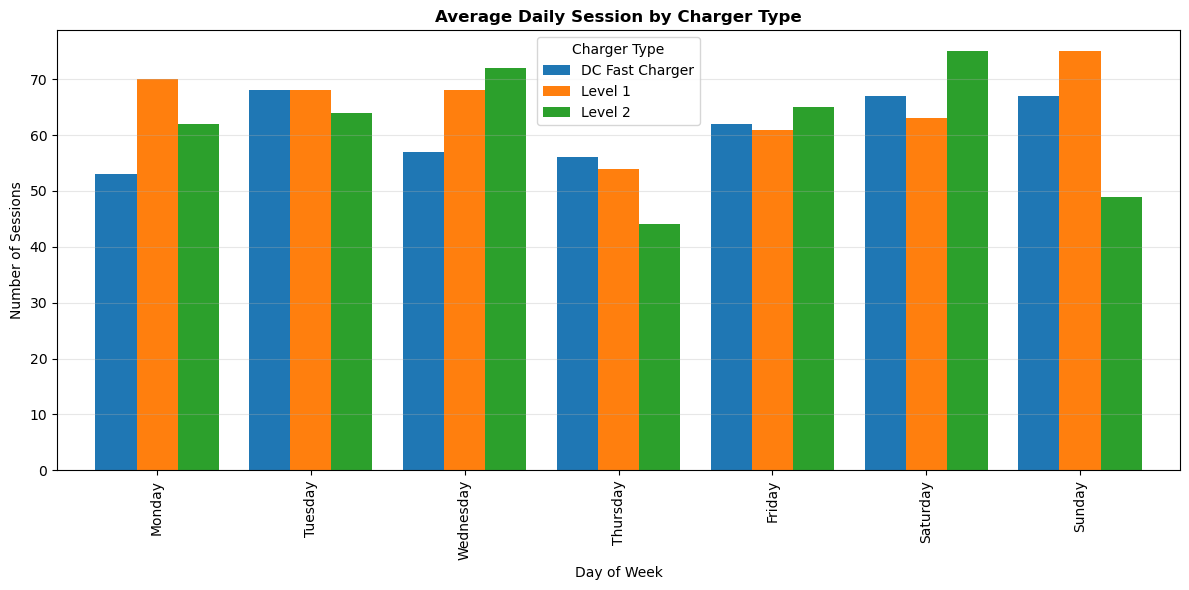

In [40]:
# Simple grouped bar chart
daily_usage = df.groupby(['Day of Week', 'Charger Type'])['Charging Station ID'].count().unstack()

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_usage = daily_usage.reindex(day_order)

# Plot
daily_usage.plot(kind='bar', figsize=(12,6), width=0.8)
plt.title('Average Daily Session by Charger Type', fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sessions')
plt.legend(title='Charger Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2.4 Distribution of Charging Duration by Charger Type
**Description**  
This box plot shows the distribution of charging durations across charger types. 

**Explanation**  
Comparing the distribution of charging durations

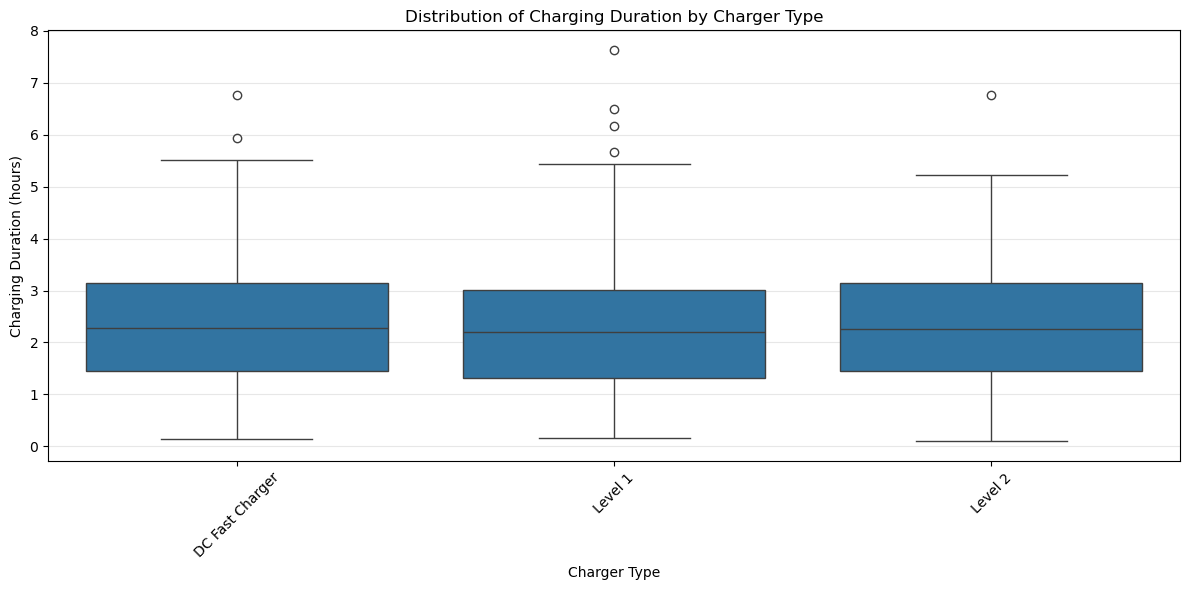

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Charger Type', y='Charging Duration (hours)', data=df_avl)
plt.title('Distribution of Charging Duration by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Charging Duration (hours)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

### 3.2.5 Total Occupancy hours by Charger Type
**Description**  
This grouped bar chart shows the daily total occupancy per charger.

**Explanation**  
Comparing daily total occupancy per charger type focuses on utilisation and revenue potential.

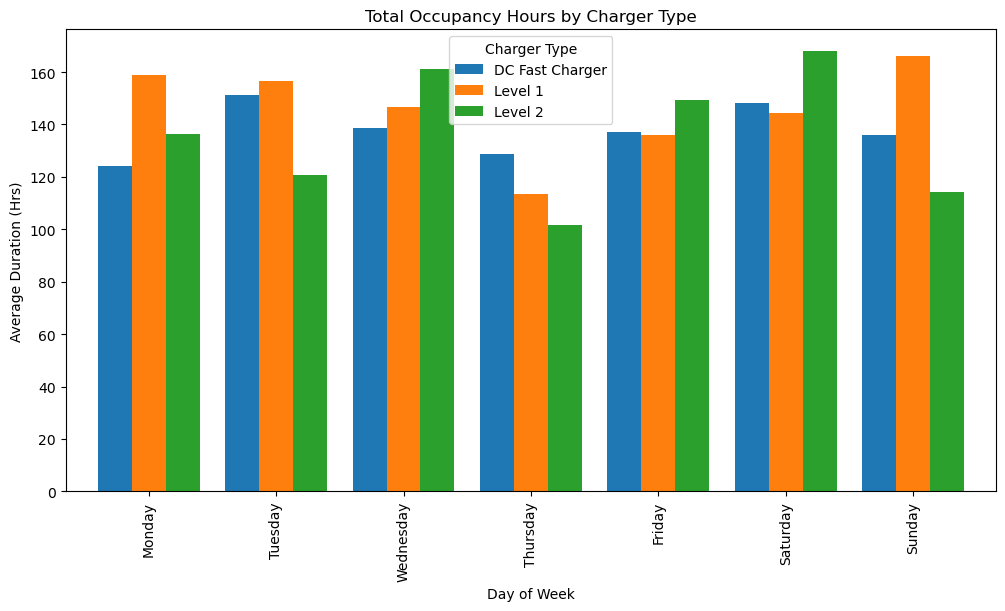

In [49]:
# Total Hours per day by charger type
total_hours = df.groupby(['Day of Week', 'Charger Type'])['Session Duration (hours)'].sum().unstack()

# Plot total hours
total_hours.reindex(day_order).plot(kind='bar', figsize=(12,6), width=0.8)
plt.title('Total Occupancy Hours by Charger Type')
plt.ylabel('Average Duration (Hrs)')
plt.show()

### 3.2.6 Distribution of Charging Duration by Time of day
**Description**  
This box plot shows the distribution of charging duration by time of day.

**Explanation**  
Comparing the distribution of charging duration by time of day.

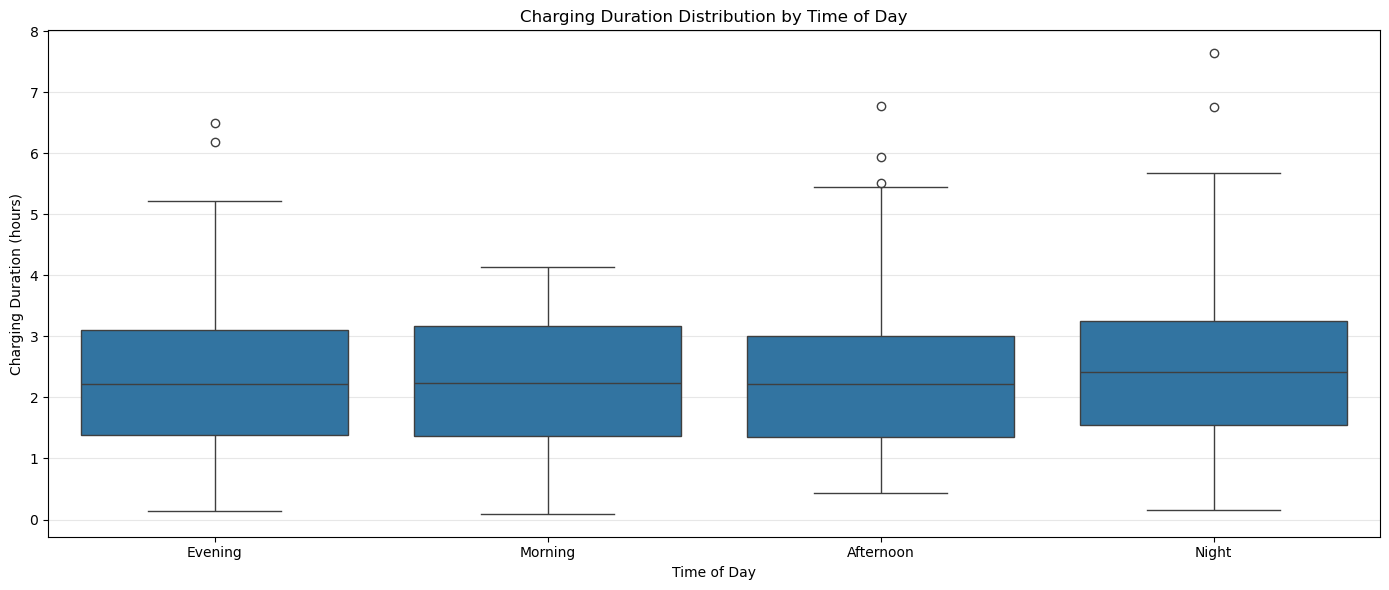

In [69]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Time of Day', y='Charging Duration (hours)', data=df)
plt.title('Charging Duration Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Charging Duration (hours)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()